In [1]:
## Downloading
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1dc54d2ca50>)

In [2]:
# loading and info
import pandas as pd
medical_df=pd.read_csv('medical.csv')
medical_df
print(medical_df.info())
print(medical_df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [3]:
################ Exploratory Analysis and Viz
# enviornment setting
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'


In [4]:
## plotting age info
import nbformat
medical_df.age.describe()
fig=px.histogram(medical_df,x='age',
                 marginal='box',
                 nbins=47,
                 title='Distribution of Age')
fig.update_layout(bargap=0.3)
fig.show()

In [5]:
# BMI Plotting
fig=px.histogram(medical_df,
                 x='bmi',
                 marginal='box',
                 color_discrete_sequence=['red'],
                 title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.2)
fig.show()

In [6]:
# Charges Plotting against smoking habits
fig=px.histogram(medical_df,
                 x='charges',
                 marginal='box',
                 color='smoker',
                 color_discrete_sequence=['orange','blue'],
                 title='Annual Medical Charges')
fig.update_layout(bargap=0.2)
fig.show()

In [7]:
fig = px.scatter(medical_df, 
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

In [8]:
fig = px.scatter(medical_df, 
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

Age and charges Correlation :  0.29900819333064765
BMI and charges Correlation :  0.19834096883362892
Children and charges Correlation :  0.06799822684790487
Smoking Habits and charges Correlation :  0.7872514304984772


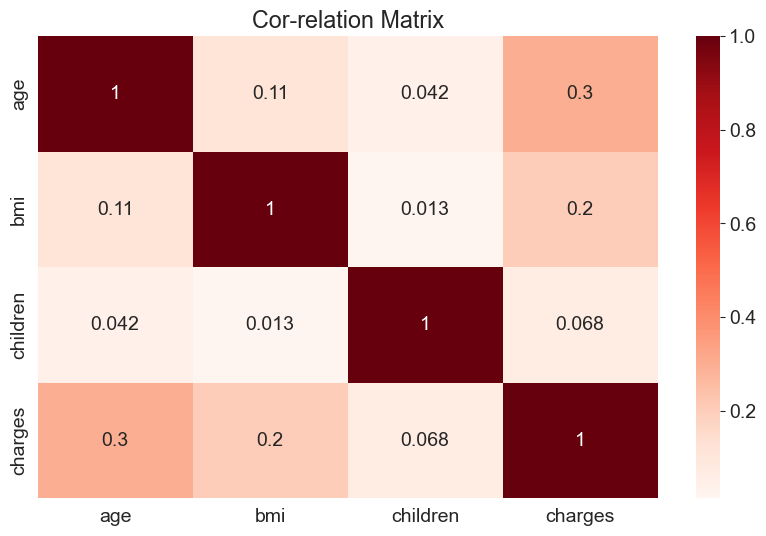

In [9]:
###### Correlation calculation
print("Age and charges Correlation : ",medical_df.charges.corr(medical_df.age))
print("BMI and charges Correlation : ",medical_df.charges.corr(medical_df.bmi))
print("Children and charges Correlation : ",medical_df.charges.corr(medical_df.children))

smoker_value={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_value)
print("Smoking Habits and charges Correlation : ",medical_df.charges.corr(smoker_numeric))

numeric_df=medical_df.select_dtypes(include=[float,int])
sns.heatmap(numeric_df.corr(),cmap='Reds',annot=True,cbar=True)
plt.title("Cor-relation Matrix")
plt.show()


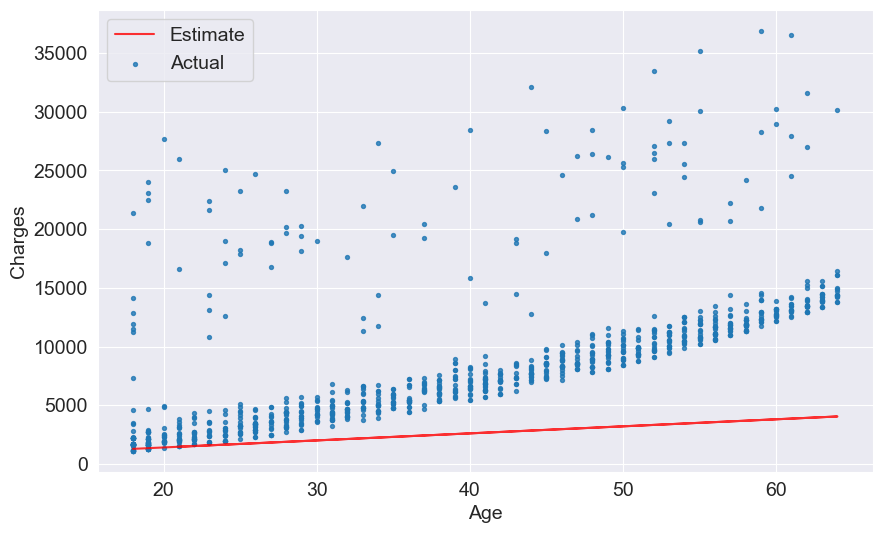

Loss :  8044.90886266932


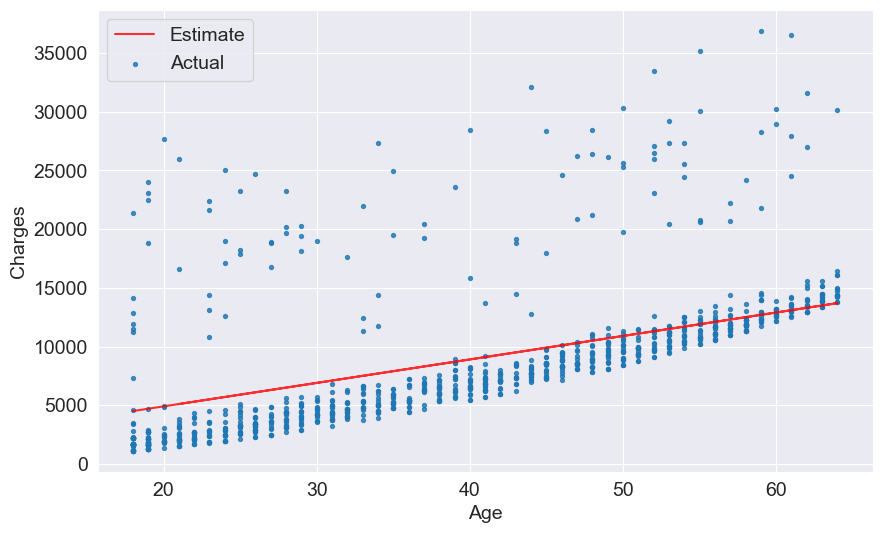

Loss :  4769.970174814167


In [10]:
###################### linear regression

non_smoker_df=medical_df[medical_df.smoker=='no']
def  estimate_charges(age,w,b):
    return w*age+b
non_smoker=medical_df[medical_df.smoker=='no']

#Loss cost func
def rmse(targets,prediction):
    return np.sqrt(np.mean(np.square(targets-prediction)))

# Helper func
def try_parameters(w,b):
    ages=non_smoker.age
    target=non_smoker_df['charges']
    prediction=estimate_charges(ages,w,b)
    
    plt.plot(ages,prediction,'r',alpha=0.8)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])
    plt.show()
    loss=rmse(target,prediction)
    print("Loss : ",loss)
try_parameters(60,200)
try_parameters(200,900)



Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.

Input :  (1064, 1)
Target :  (1064,)
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
RMSE :  4662.505766636395
Weight :  [267.24891283] 
Bias :  -2091.4205565650827


c:\Users\Ayush\anaconda3\envs\Shikha_Chaurasia\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



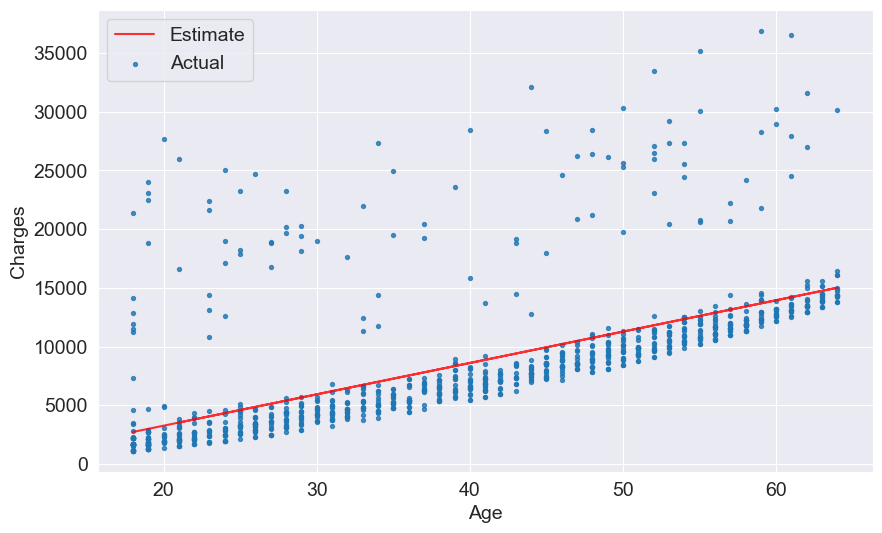

Loss :  4662.505766636395


In [11]:
# using sklearn for training(Non smoker)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
help(model.fit)

inputs=non_smoker_df[['age']]
target=non_smoker_df.charges
print('Input : ',inputs.shape)
print('Target : ',target.shape)
model.fit(inputs,target)

#prediction
model.predict(np.array([[23],[37],[61]]))
prediction=model.predict(inputs)
print(prediction)
RMSE=rmse(target,prediction)
print('RMSE : ',RMSE)

weight=model.coef_
bias=model.intercept_
print("Weight : ",weight,'\nBias : ',bias)
try_parameters(model.coef_,model.intercept_)


[26093.642567   39218.85945773 28535.54338388 29451.25619021
 30672.20659865 29756.49379232 27009.35537333 28840.78098599
 30977.44420076 38608.38425351 31282.68180287 34945.53302819
 31282.68180287 37997.90904929 25788.40496489 36471.72103874
 26398.88016911 28840.78098599 28535.54338388 27009.35537333
 31587.91940498 34029.82022186 37692.67144718 38303.1466514
 39829.33466195 37387.43384507 31893.15700709 38913.62185562
 26398.88016911 39524.09705984 29146.0185881  33724.58261975
 26093.642567   30061.73139443 30672.20659865 29451.25619021
 34335.05782397 33114.10741553 34945.53302819 25788.40496489
 29451.25619021 33114.10741553 25788.40496489 39524.09705984
 31282.68180287 28535.54338388 30977.44420076 26093.642567
 33114.10741553 32503.63221131 26093.642567   27314.59297544
 39524.09705984 25788.40496489 39524.09705984 36776.95864085
 35556.00823241 37387.43384507 26093.642567   26398.88016911
 36166.48343663 26093.642567   34335.05782397 32503.63221131
 35556.00823241 32503.63221

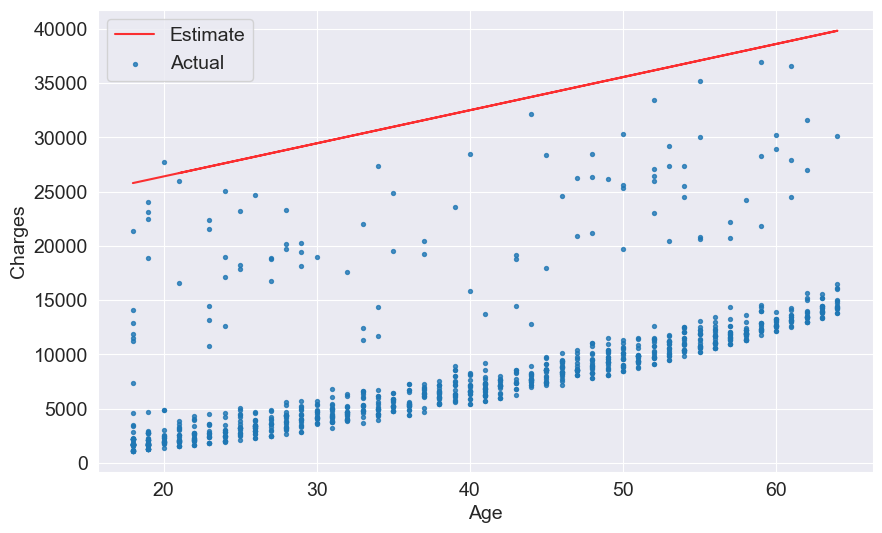

Loss :  24338.502872599212


In [12]:
smoker_df=medical_df[medical_df.smoker=='yes']
inputs,target=smoker_df[['age']],smoker_df.charges
model.fit(inputs,target)

#prediction
prediction=model.predict(inputs)
print(prediction)
RMSE=rmse(target,prediction)
print('RMSE : ',RMSE)

weight=model.coef_
bias=model.intercept_
print("Weight : ",weight,'\nBias : ',bias)
try_parameters(model.coef_,model.intercept_)

In [13]:
############## linear regression using Multiple Features(2)
inputs,target=non_smoker_df[['age','bmi']],non_smoker_df['charges']
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(target,predictions)
print("Loss : ",loss)

# correlation print
non_smoker_df.charges.corr(non_smoker_df.bmi)
fig=px.scatter(non_smoker,x='bmi',y='charges',title='BMi vs charges cor-relation')
fig.update_traces(marker_size=5)

Loss :  4662.3128354612945


In [14]:
fig=px.scatter_3d(non_smoker,x='age',y='bmi',z='charges')
fig.update_traces(marker_size=3,marker_opacity=0.7)
fig.show()

In [15]:
############## linear regression using Multiple Features(3)
input,target = smoker_df[['age','bmi','children']],smoker_df.charges
model=LinearRegression().fit(input,target)
prediction=model.predict(input)

loss=rmse(target,prediction)
print("Loss : ",loss)

Loss :  5718.202480524154


In [16]:
############## linear regression using Multiple Features(4) categorial data
smoker_code={'no':0,'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)
print("Cor-relation between charges and smoking habits :  ",medical_df.charges.corr(medical_df.smoker_code))


input,target=medical_df[['age','bmi','children','smoker_code']],medical_df['charges']
model=LinearRegression().fit(input,target)

prediction=model.predict(input)
loss=rmse(target,prediction)
print("Loss : ",loss)

Cor-relation between charges and smoking habits :   0.7872514304984772
Loss :  6056.439217188081


In [17]:
############## linear regression using Multiple Features(5) categorial data
sex_code={'female':0,'male':1}
medical_df['sex_code']=medical_df.sex.map(sex_code)
print("Cor-relation between charges and sex :  ",medical_df.charges.corr(medical_df.sex_code))


input,target=medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df['charges']
model=LinearRegression().fit(input,target)

prediction=model.predict(input)
loss=rmse(target,prediction)
print("Loss : ",loss)




Cor-relation between charges and sex :   0.057292062202025415
Loss :  6056.100708754546


In [18]:
############## linear regression using Multiple Features(6) categorial data (One-hot encoding)
#encoding
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

#ML train
input_cols=['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
input,target=medical_df[input_cols],medical_df['charges']

model=LinearRegression().fit(input,target)
predictions=model.predict(input)

loss=rmse(target,predictions)
print("Loss : ",loss)

Loss :  6041.6796511744515


In [19]:
####### Model Improvement
from sklearn.preprocessing import StandardScaler

numerical_cols=['age','bmi','children']
scalar=StandardScaler()
scalar.fit(medical_df[numerical_cols])
print("Scaler Mean : ",scalar.mean_)
print("Scaler Variable : ",scalar.var_)
scalar_inputs=scalar.transform(medical_df[numerical_cols])

##LR
cat_cols=['smoker_code','sex_code','northwest','northeast','southeast','southwest']
categorical_cols=medical_df[cat_cols].values
inputs=np.concatenate((scalar_inputs,categorical_cols),axis=1)
targets=medical_df['charges']

model=LinearRegression().fit(inputs,targets)
prediction=model.predict(inputs)

loss=rmse(targets,prediction)
print("Loss : ",loss)

Scaler Mean :  [39.20702541 30.66339686  1.09491779]
Scaler Variable :  [197.25385199  37.16008997   1.45212664]
Loss :  6041.6796511744515


In [20]:
################## weight comparision
weight_df=pd.DataFrame({
    'feature':np.append(numerical_cols+cat_cols,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weight_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
6,northeast,587.009235
2,children,572.998210
5,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Test Loss: 5999.839244692617
Training Loss: 6048.521262394127
Loss diff (Test and train) -48.68201770150972


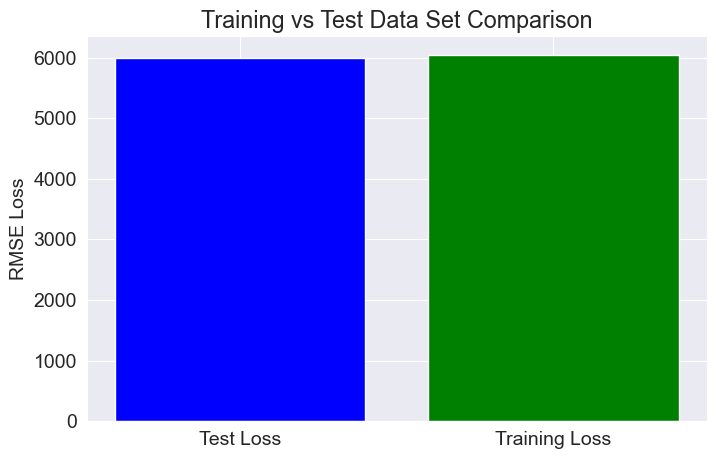

In [25]:
######### Test vs Training data set comparision

from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)
model = LinearRegression().fit(inputs_train, targets_train)

#Test data
predictions_test = model.predict(inputs_test)
loss1 = rmse(targets_test, predictions_test)
print('Test Loss:', loss1)

#Train data
predictions_train = model.predict(inputs_train)
loss2 = rmse(targets_train, predictions_train)
print('Training Loss:', loss2)

print("Loss diff (Test and train)",(loss1-loss2))

# Plotting the losses
losses = [loss1, loss2]
labels = ['Test Loss', 'Training Loss']

plt.figure(figsize=(8, 5))
plt.bar(labels, losses, color=['blue', 'green'])
plt.ylabel('RMSE Loss')
plt.title('Training vs Test Data Set Comparison')
plt.show()